In [1545]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.optimize import curve_fit
import math

In [1546]:
def read_data():
    ''' reading data function but without hkl and everything of hkl file'''
    with open("data_storage.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        first_sample = data[0]
        name = first_sample["name"]
        path = first_sample["data"]["path"] 
        kalpha1 = first_sample["data"]["kalpha1"][0]
        kalpha2 = first_sample["data"]["kalpha2"][0]
        theta_start = first_sample["data"]["theta_start"][0]
        theta_stop = first_sample["data"]["theta_stop"][0]
        uvw_xy = first_sample["data"]["uvw_xy"] 
        start_step_end = first_sample["data"]["start_step_end"] 
        counts = json.loads(first_sample["data"]["counts"] )
        counts_bac = json.loads(first_sample["data"]["counts_bac"])
        hkl_plus = first_sample["data"]["hkl"][0]

    return uvw_xy,kalpha1,kalpha2,theta_start,theta_stop,path,counts,start_step_end,counts_bac,name,hkl_plus

In [1547]:
def read_data_of_hkl(hkl_plus):
    '''function reading data hkl and everything of hkl file'''
    h = hkl_plus['h']
    k = hkl_plus['k']
    l = hkl_plus['l']
    mult = hkl_plus['mult']
    sinT_lamb = hkl_plus['sinT_lamb']
    two_theta = hkl_plus['tt']
    fwhm = hkl_plus['fwhm']
    f2 = hkl_plus['f2']
    sf2 = hkl_plus['sf2']
    return h,k,l,mult,sinT_lamb,two_theta,fwhm,f2,sf2

In [1548]:
def plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop,on):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)
    x = np.arange(theta_start, theta_stop, N)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, counts, label="Counts (sample)", color="blue")
    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    if on:
        plt.plot(x, counts_bac, label="Counts (background)", color="orange")
    plt.legend()
    plt.show()

In [1549]:
def plot_with_theta_sample(counts,name,theta_start,theta_stop,two_theta):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)
    x = np.arange(theta_start, theta_stop, N)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, counts, label="Counts (sample)", color="blue")
    for i in range(len(two_theta)):
        plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    plt.legend()
    plt.show()


In [1550]:
def checking_part_of_plot(counts,theta_start,theta_stop,two_theta,a=150):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)   
    x = np.arange(theta_start, theta_stop, N)
    range_of_part = [0]
    k = 1
    while range_of_part[-1]<len(x)-a:
        range_of_part.append(k*a)
        k+=1
    for j in range(len(range_of_part)-1):
        for i in range(len(two_theta)):
            if two_theta[i] < x[range_of_part[j+1]] and two_theta[i] > x[range_of_part[j]]:
                plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
        plt.plot(x[range_of_part[j]:range_of_part[j+1]],counts[range_of_part[j]:range_of_part[j+1]],color='green')
        # plt.plot(x[range_of_part[j]:range_of_part[j+1]:2],counts[range_of_part[j]:range_of_part[j+1]:2])
        plt.scatter(x[range_of_part[j]:range_of_part[j+1]],counts[range_of_part[j]:range_of_part[j+1]],color='orange', linestyle='--', linewidth=0.5)
        plt.show()
      
    for i in range(len(two_theta)):
            if two_theta[i] < x[-1] and two_theta[i] > x[3000]:
                plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
    plt.plot(x[3000:],counts[3000:])
    plt.scatter(x[3000:],counts[3000:],color='orange', linestyle='--', linewidth=0.5)
    plt.show()
   

In [1551]:
def part_of_plot(counts,theta_start,theta_stop,peak_index,a=150):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)   
    x = np.arange(theta_start, theta_stop, N)
    range_of_part,peak_count = [0],[]
    k = 1
    while range_of_part[-1]<len(x)-a:
        range_of_part.append(k*a)
        k+=1
    for i in range(len(x)):
        if i in peak_index:
            peak_count.append(counts[i])
            plt.axvline(x[i],color='red', linestyle='--', linewidth=0.5)
            
    plt.plot(x, counts, label="Counts (sample)", color="blue")
    plt.show()
    return peak_count   


In [1552]:
def find_counts_of_peaks(counts,two_theta,theta_start,theta_stop):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)   
    x = np.arange(theta_start, theta_stop, N)
    peaks = np.zeros(len(two_theta))
    for i in range(len(two_theta)):
        peaks[i] = (two_theta[i]-theta_start)/N
    # print(peaks)
    # print(counts)
    # for i in range(len(peaks)):
    #     plt.axvline(peaks[i],color='red', linestyle='--', linewidth=0.5)
    # plt.plot(counts)
    # plt.show()
    for i in range(len(peaks)):
        if peaks[i]-int(peaks[i])>0.5:
            peaks[i] = int(peaks[i]+1)
        else:
            peaks[i] = int(peaks[i]) 
    # print(peaks)
    return peaks
    

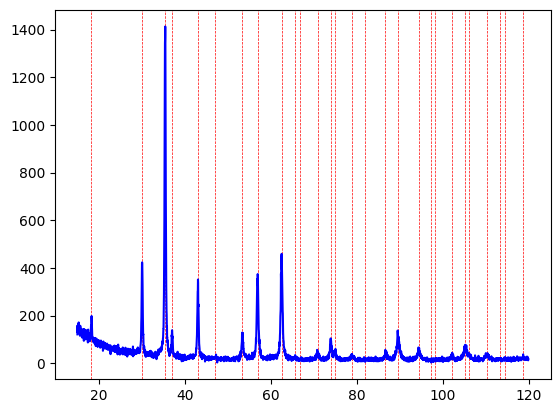

3
[192, 423, 1365, 138, 305, 29, 127, 328, 454, 18, 10, 45, 104, 56, 38, 21, 38, 127, 55, 3, 14, 16, 55, 35, 29, 19, 16, 37]
[  98.  451.  611.  660.  839.  962. 1149. 1255. 1422. 1518. 1550. 1674.
 1764. 1794. 1913. 2001. 2146. 2232. 2377. 2464. 2493. 2610. 2699. 2729.
 2851. 2944. 2976. 3105.]


In [1553]:
uvw_xy, kalpha1,kalpha2,theta_start,theta_stop,path, counts, start_step_end, counts_bac,name,hkl_plus= read_data()
h,k,l,mult,sinT_lamb,two_theta,fwhm,f2,sf2 = read_data_of_hkl(hkl_plus)
theta = []
#pozbycie się powielonych danych
for i in range(len(two_theta)-1):
    if abs(two_theta[i]-two_theta[i+1])<0.001:
        continue
    else:
        theta.append(two_theta[i])
if two_theta[-1] not in theta:
    theta.append(two_theta[-1]) 
two_theta = theta
  
# plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop,True)
# checking_part_of_plot(counts,theta_start,theta_stop,two_theta)
peak_index = find_counts_of_peaks(counts,two_theta,theta_start,theta_stop)
peak_count = part_of_plot(counts,theta_start,theta_stop,peak_index)


print(min(peak_count))
print(peak_count)
print(peak_index)


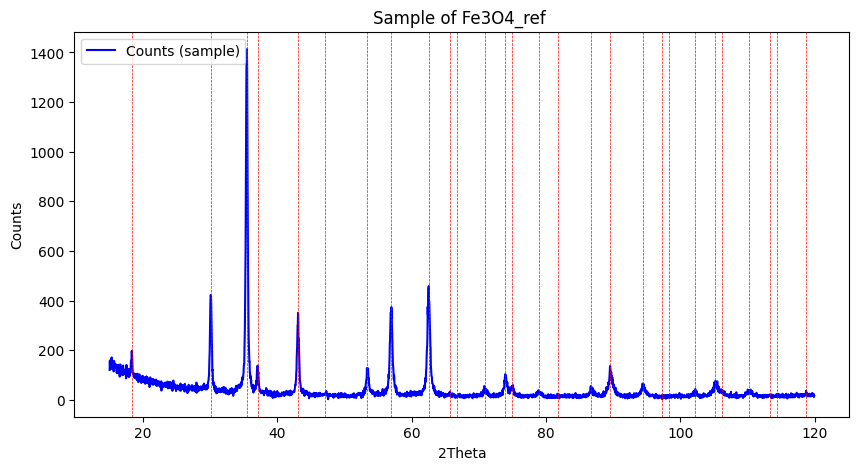

In [1554]:
plot_with_theta_sample(counts,name,theta_start,theta_stop,two_theta)


In [1555]:
def delete_bac(counts,counts_bac):
    """ function to subtract background """
    only_counts=np.zeros(len(counts))
    for i in range(len(counts)):
        only_counts[i] = abs(counts[i]-counts_bac[i])
    return only_counts


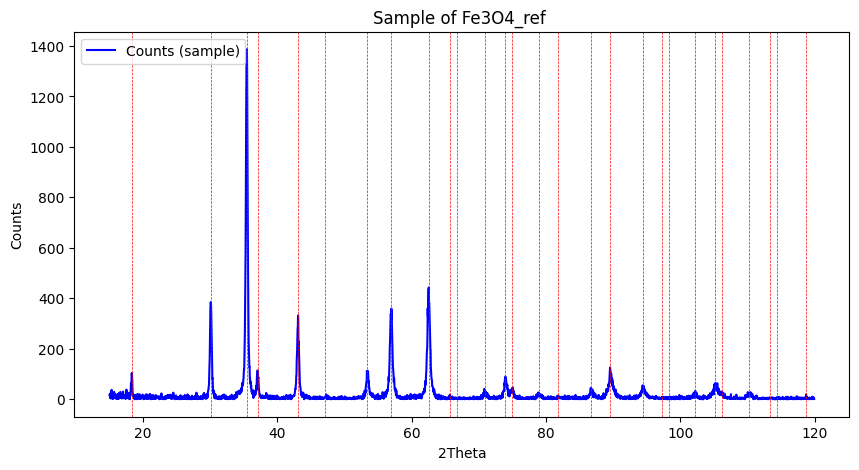

In [1556]:

only_counts = delete_bac(counts,counts_bac)

# plot_sample__bac(only_counts,counts_bac,name,theta_start,theta_stop,False)
plot_with_theta_sample(only_counts,name,theta_start,theta_stop,two_theta)
# checking_part_of_plot(only_counts,theta_start,theta_stop,two_theta,100)



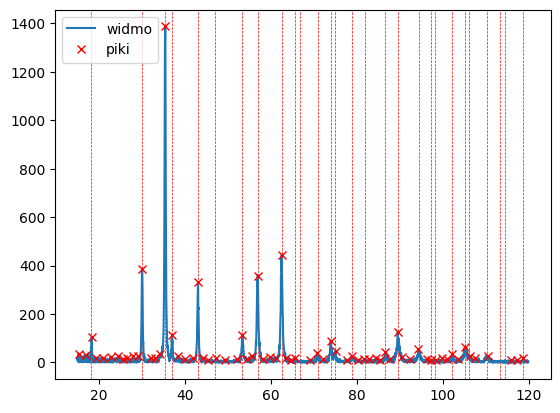

69
[np.float64(15.303818375471039), np.float64(17.007825306473592), np.float64(18.31088943018143), np.float64(19.4468940508498), np.float64(21.050665280028674), np.float64(22.721260310423336), np.float64(24.492091042641675), np.float64(25.56127186209426), np.float64(26.59704078093895), np.float64(27.93351680525468), np.float64(29.06952142592305), np.float64(30.071878444159847), np.float64(32.04318058002555), np.float64(33.179185200693915), np.float64(34.281777920754394), np.float64(35.451194442030655), np.float64(37.021553770601635), np.float64(38.324617894309476), np.float64(39.96180102409624), np.float64(41.933103159961945), np.float64(43.06910778063031), np.float64(44.27193620251447), np.float64(45.40794082318284), np.float64(47.279007257224855), np.float64(49.45078079673792), np.float64(52.05690904415359), np.float64(53.32656126725353), np.float64(54.36233018609823), np.float64(55.66539430980606), np.float64(56.968458433513895), np.float64(58.238110656613834), np.float64(59.8418818

In [1557]:
# wykrywanie pików
step = len(only_counts)
N = ((theta_stop - theta_start)/step)   
x = np.arange(theta_start, theta_stop, N)

from scipy.signal import find_peaks
peaks, dict = find_peaks(only_counts, height=10, distance=30)

for i in range(len(two_theta)):
        plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
plt.plot(x, only_counts, label='widmo')
plt.plot(x[peaks], only_counts[peaks], 'rx', label='piki')
plt.legend()
plt.show()
p,c=[],[]
print(len(peaks))
for i in peaks:
    p.append(x[i])
print(p)
print(two_theta)
print(len(two_theta))
print(dict)
# for i in two_theta:
#     c.append(only_counts[])
# print(c)

In [1558]:
max_count_difference = []
ind = []
for i in range(len(only_counts)-1):
    if abs(only_counts[i]-only_counts[i+1])>50:
        max_count_difference.append(abs(only_counts[i]-only_counts[i+1]))
        ind.append(i)
step = len(only_counts)
N = ((theta_stop - theta_start)/step)   
x = np.arange(theta_start, theta_stop, N)
print(max_count_difference)
print(ind)
print(x[ind])

[np.float64(68.0), np.float64(86.0), np.float64(54.0), np.float64(79.0), np.float64(52.0), np.float64(52.0), np.float64(52.0), np.float64(100.0), np.float64(89.0), np.float64(125.0), np.float64(229.0), np.float64(175.0), np.float64(178.0), np.float64(153.0), np.float64(80.0), np.float64(275.0), np.float64(159.0), np.float64(212.0), np.float64(156.0), np.float64(136.0), np.float64(79.0), np.float64(70.0), np.float64(52.0), np.float64(100.0), np.float64(52.0), np.float64(52.0), np.float64(55.0), np.float64(54.0), np.float64(107.0), np.float64(73.0), np.float64(64.0), np.float64(56.0), np.float64(66.0)]
[446, 447, 453, 454, 455, 600, 601, 603, 604, 605, 606, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 833, 841, 844, 1248, 1258, 1261, 1417, 1419, 1423, 1428, 1431]
[29.90481894 29.93823084 30.13870225 30.17211415 30.20552605 35.05025163
 35.08366354 35.15048734 35.18389924 35.21731114 35.25072304 35.28413494
 35.31754684 35.35095874 35.45119444 35.48460634 35.51801824 35.55143014

In [1559]:
def gaussian_lorenzian(uvw_xy,kalpha_theta):
    u = uvw_xy[0] 
    v = uvw_xy[1]
    w = uvw_xy[2]
    x_ = uvw_xy[3]
    y = uvw_xy[4]
    theta = kalpha_theta[2]/2 #  tutaj coś jakby trzeba dopracować bo biorę tylko początkowy kąt, a co z końcowym ? 
    fwhm2_gauss = u*math.tan(theta)**2+v*math.tan(theta)+w
    fwhm_lorenz = x_*math.tan(theta)+(y/(math.cos(theta)))
    print(fwhm2_gauss)
    print(fwhm_lorenz)

In [1560]:
# # --- Funkcje pomocnicze ---
# def gaussian(x, A, x0, sigma):
#     """Pojedyncza funkcja Gaussa."""
#     return A * np.exp(-0.5 * ((x - x0) / sigma) ** 2)

# def multi_gaussian(x, *params):
#     """Suma wielu funkcji Gaussa."""
#     y = np.zeros_like(x)
#     n = len(params) // 3
#     for i in range(n):
#         A = params[3*i]
#         x0 = params[3*i+1]
#         sigma = params[3*i+2]
#         y += gaussian(x, A, x0, sigma)
#     return y

# # --- Dane wejściowe ---
# # Załóżmy, że masz dane XRD: only_counts, theta_start, theta_stop
# # (theta_start, theta_stop np. 10–90°, only_counts np. tablica intensywności)
# step = len(only_counts)
# N = ((theta_stop - theta_start) / step)
# x = np.arange(theta_start, theta_stop, N)

# # --- Detekcja pików ---
# peaks, props = find_peaks(only_counts, height=2.5, distance=30, prominence=0.2)
# peaks2, props2 = find_peaks(only_counts, height=2.5, distance=30, prominence=0.2)


# for i in range(len(peaks)):
#     plt.axvline(peaks[i])
# for i in range(len(two_theta)):
#     plt.axvline((two_theta[i]-theta_start)/N, color='red', linestyle='--', linewidth=0.5)
# plt.plot(only_counts,color='green')
# plt.xlabel('2θ [°]')
# plt.ylabel('Intensywność')
# plt.legend(fontsize=8)
# plt.tight_layout()
# plt.show()
# for i in range(len(peaks2)):
#     plt.axvline(peaks2[i])
# for i in range(len(two_theta)):
#     plt.axvline((two_theta[i]-theta_start)/N, color='red', linestyle='--', linewidth=0.5)
# plt.plot(counts,color='green')
# plt.xlabel('2θ [°]')
# plt.ylabel('Intensywność')
# plt.legend(fontsize=8)
# plt.tight_layout()
# plt.show()

# print(len(peaks))
# print(len(peaks2))



# for p in peaks:
#     # wybór danych wokół piku
#     left = max(p - 30, 0)
#     right = min(p + 30, len(x))
#     x_fit = x[left:right]
#     y_fit = only_counts[left:right]

#     # szacunki początkowe parametrów (A, x0, sigma)
#     A0 = only_counts[p]
#     x0_0 = x[p]
#     sigma0 = (x[right] - x[left]) / 6 #0.1  # np. 0.1° – zależnie od kroku

#     # dopasowanie krzywej Gaussa
#     popt, pcov = curve_fit(gaussian, x_fit, y_fit, p0=[A0, x0_0, sigma0],maxfev = 1000)

#     # wyniki
#     A_fit, x0_fit, sigma_fit = popt
#     print(f"Pik przy 2θ = {x0_fit:.2f}°, A = {A_fit:.1f}, σ = {sigma_fit:.3f}")

#     # narysuj dopasowanie
#     plt.plot(x_fit, y_fit, 'b.', label='Dane')
#     plt.plot(x_fit, gaussian(x_fit, *popt), 'r-', label='Gauss')
#     plt.legend()
#     plt.xlabel('2θ [°]')
#     plt.ylabel('Intensywność')
#     plt.show()


In [1561]:
# # To jest lista, więc weź pierwszy element
# entry = data[0]
# # Odczytanie nazwy
# print("Nazwa:", entry["name"])

# # Odczytanie ścieżki
# print("Ścieżka do pliku:", entry["data"]["path"])

# # Odczytanie theta_start
# print("Theta start:", entry["data"]["theta_start"][0])

# # Uwaga: counts i counts_bac to STRING z listą -> trzeba go sparsować
# counts = json.loads(entry["data"]["counts"])
# counts_bac = json.loads(entry["data"]["counts_bac"])

# print("Pierwsze 10 counts:", counts[:10])
# print("Pierwsze 10 counts_bac:", counts_bac[:10])

Znaleziono 47 pików. R^2 dopasowania: 0.9942
Peak 1: A=18.384, x0=10.304, sigma=6.920, FWHM=16.296
Peak 2: A=84.782, x0=18.294, sigma=0.091, FWHM=0.215
Peak 3: A=0.754, x0=20.760, sigma=0.579, FWHM=1.363
Peak 4: A=3.378, x0=21.953, sigma=0.549, FWHM=1.292
Peak 5: A=5.072, x0=24.099, sigma=0.512, FWHM=1.205
Peak 6: A=7.445, x0=30.257, sigma=3.608, FWHM=8.497
Peak 7: A=69.256, x0=30.081, sigma=0.261, FWHM=0.616
Peak 8: A=319.241, x0=30.069, sigma=0.111, FWHM=0.262
Peak 9: A=88.278, x0=37.043, sigma=0.123, FWHM=0.291
Peak 10: A=23.384, x0=34.443, sigma=0.368, FWHM=0.868
Peak 11: A=1085.922, x0=35.425, sigma=0.115, FWHM=0.271
Peak 12: A=283.741, x0=35.424, sigma=0.286, FWHM=0.673
Peak 13: A=9.861, x0=43.418, sigma=0.010, FWHM=0.024
Peak 14: A=18.821, x0=36.332, sigma=1.136, FWHM=2.676
Peak 15: A=205.415, x0=43.059, sigma=0.114, FWHM=0.268
Peak 16: A=94.934, x0=43.054, sigma=0.263, FWHM=0.619
Peak 17: A=7.520, x0=43.578, sigma=3.671, FWHM=8.645
Peak 18: A=3.505, x0=49.548, sigma=0.100, FWHM

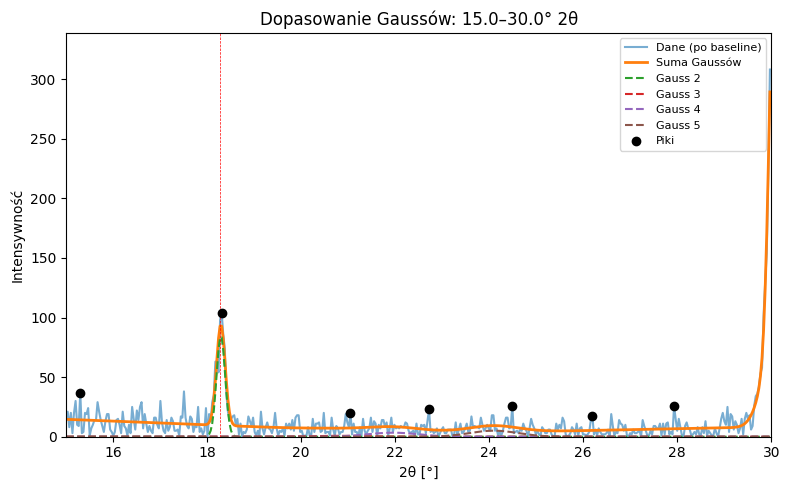

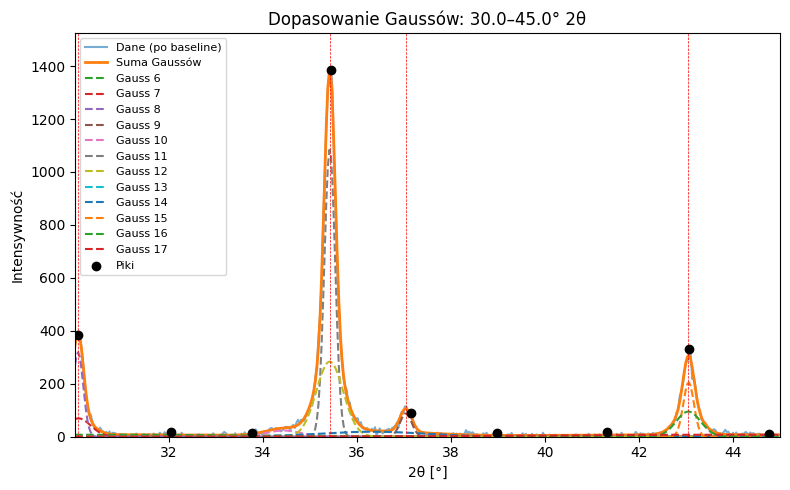

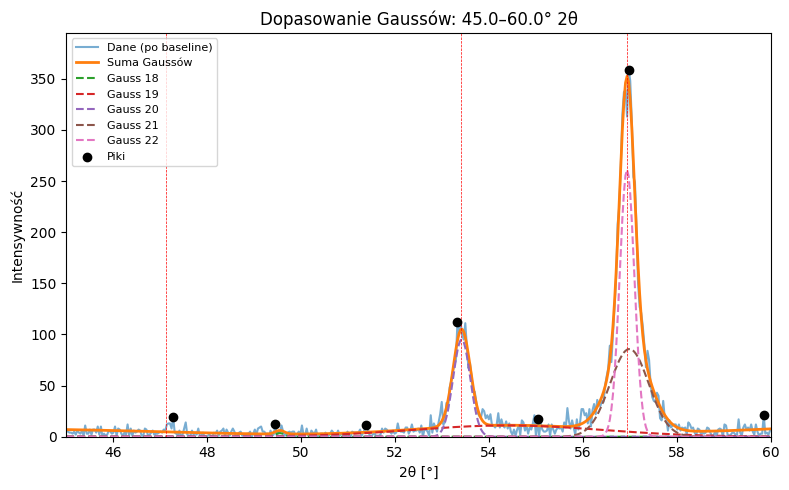

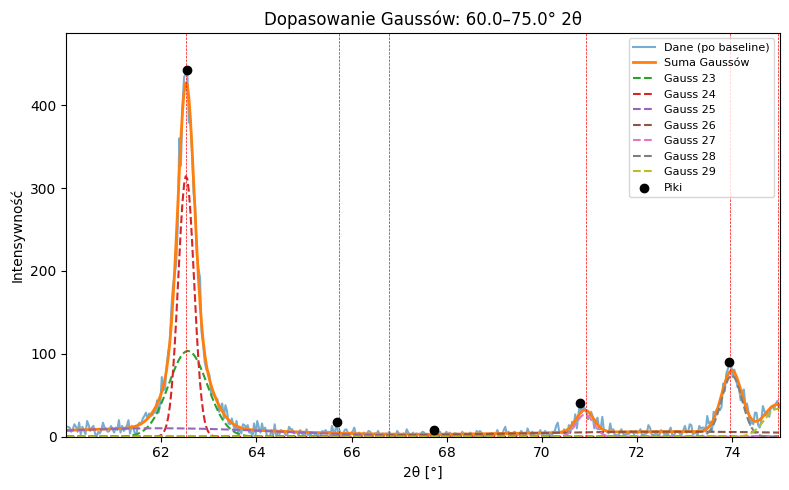

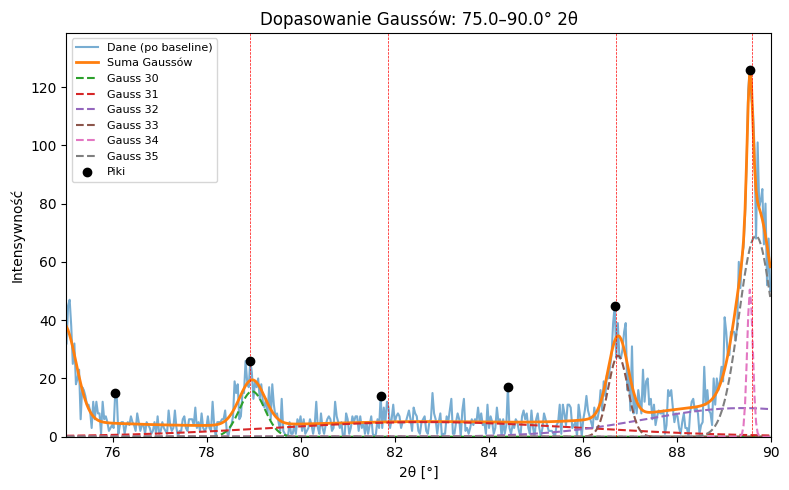

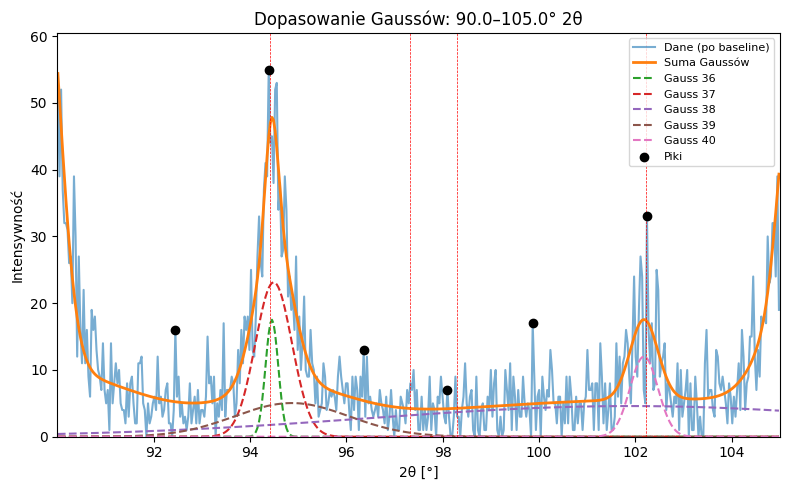

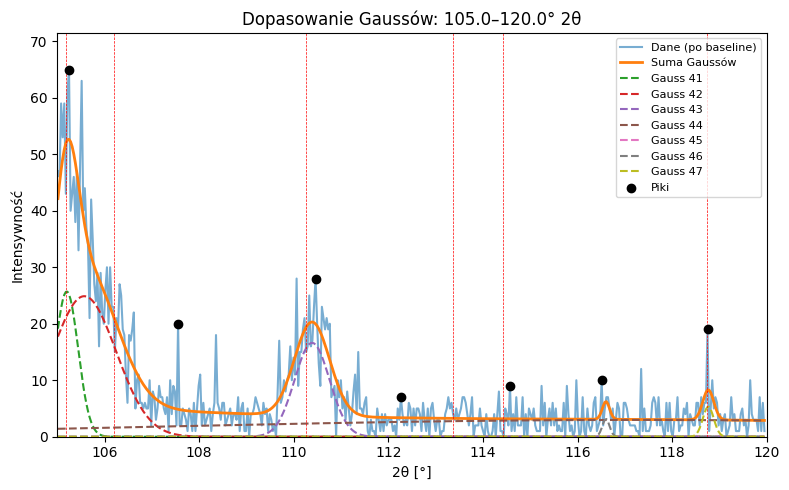

In [1562]:
# --- Funkcje pomocnicze ---
def gaussian(x, A, x0, sigma):
    """Pojedyncza funkcja Gaussa."""
    return A * np.exp(-0.5 * ((x - x0) / sigma) ** 2)

def multi_gaussian(x, *params):
    """Suma wielu funkcji Gaussa."""
    y = np.zeros_like(x)
    n = len(params) // 3
    for i in range(n):
        A = params[3*i]
        x0 = params[3*i+1]
        sigma = params[3*i+2]
        y += gaussian(x, A, x0, sigma)
    return y

# --- Dane wejściowe ---
# Załóżmy, że masz dane XRD: only_counts, theta_start, theta_stop
# (theta_start, theta_stop np. 10–90°, only_counts np. tablica intensywności)
step = len(only_counts)
N = ((theta_stop - theta_start) / step)
x = np.arange(theta_start, theta_stop, N)

# --- Detekcja pików ---
peaks, props = find_peaks(only_counts, height=3, distance=50, prominence=0.2)

# --- Przygotowanie zgadywań do dopasowania ---
guesses = []
bounds_lower = []
bounds_upper = []
for pk in peaks:
    A_guess = props['peak_heights'][np.where(peaks == pk)][0]
    x0_guess = x[pk]
    sigma_guess = 1.0
    guesses += [A_guess, x0_guess, sigma_guess]
    bounds_lower += [0.0, x0_guess - 5.0, 0.01]
    bounds_upper += [np.max(only_counts) * 5, x0_guess + 5.0, 10.0]

if len(guesses) == 0:
    print("Nie znaleziono pików - spróbuj obniżyć progu 'height' lub 'prominence'.")
else:
    # --- Dopasowanie sumy Gaussów ---
    popt, pcov = curve_fit(
        multi_gaussian, x, only_counts,
        p0=guesses, bounds=(bounds_lower, bounds_upper), maxfev=20000
    )

    fit_y = multi_gaussian(x, *popt)
    residuals = only_counts - fit_y
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((only_counts - np.mean(only_counts)) ** 2)
    r2 = 1 - ss_res / ss_tot

    print(f"Znaleziono {len(peaks)} pików. R^2 dopasowania: {r2:.4f}")
    for i in range(len(peaks)):
        A, x0, sigma = popt[3*i:3*i+3]
        fwhm = 2.355 * sigma
        print(f"Peak {i+1}: A={A:.3f}, x0={x0:.3f}, sigma={sigma:.3f}, FWHM={fwhm:.3f}")

    # --- Podział wykresu co 20° 2θ ---
    x_min = np.min(x)
    x_max = np.max(x)
    segment_width = 15  # szerokość segmentu (np. 20° 2θ)
    num_segments = int(np.ceil((x_max - x_min) / segment_width))

    print(f"\nTworzę {num_segments} wykresów (co {segment_width}° 2θ)...")

    for seg in range(num_segments):
        seg_start = x_min + seg * segment_width
        seg_end = seg_start + segment_width

        mask = (x >= seg_start) & (x < seg_end)
        if not np.any(mask):
            continue

        x_seg = x[mask]
        y_seg = only_counts[mask]
        fit_seg = fit_y[mask]

        plt.figure(figsize=(8, 5))
        plt.plot(x_seg, y_seg, label='Dane (po baseline)', alpha=0.6)
        plt.plot(x_seg, fit_seg, lw=2, label='Suma Gaussów')

        # rysuj tylko te Gaussy, które leżą w tym przedziale
        for i in range(len(peaks)):
            Ai, x0i, si = popt[3*i:3*i+3]
            if seg_start <= x0i < seg_end:
                plt.plot(x_seg, gaussian(x_seg, Ai, x0i, si), '--', label=f'Gauss {i+1}')

        # tylko piki w tym przedziale
        local_peaks = [pk for pk in peaks if seg_start <= x[pk] < seg_end]
        plt.scatter(x[local_peaks], only_counts[local_peaks], color='k', zorder=10, label='Piki')
        for i in range(len(two_theta)):
            plt.axvline(two_theta[i], color='red', linestyle='--', linewidth=0.5)
        # 🔹 Ogranicz widok osi X do danego segmentu
        plt.xlim(seg_start, seg_end)
        # 🔹 Opcjonalnie: automatyczne dopasowanie Y
        plt.ylim(y_seg.min() * 0.9, y_seg.max() * 1.1)

        plt.title(f'Dopasowanie Gaussów: {seg_start:.1f}–{seg_end:.1f}° 2θ')
# for i in range(len(peaks)):
#     plt.axvline(peaks[i])
# for i in range(len(two_theta)):
#     plt.axvline(two_theta[i], color='red', linestyle='--', linewidth=0.5)
# plt.plot(counts)
        plt.xlabel('2θ [°]')
        plt.ylabel('Intensywność')
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()
